In [17]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
%matplotlib inline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.compose import ColumnTransformer
# for Classifcation
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, \
    precision_recall_fscore_support,precision_score,recall_score
# for Regression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score,\
explained_variance_score, max_error, median_absolute_error
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split, GridSearchCV,RandomizedSearchCV
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
'''
import lazypredict
from lazypredict.Supervised import LazyClassifier
from lazypredict.Supervised import LazyRegressor
from pycaret.regression import *
from pycaret.classification import *
from pycaret.clustering import *
'''

'\nimport lazypredict\nfrom lazypredict.Supervised import LazyClassifier\nfrom lazypredict.Supervised import LazyRegressor\nfrom pycaret.regression import *\nfrom pycaret.classification import *\nfrom pycaret.clustering import *\n'

In [18]:
df=pd.read_csv(r"C:\Users\salma elbadry\Desktop\Projects\boston_regression\BostonHousing.csv")

In [19]:
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [20]:
#data cleaning

In [21]:
l=df.isna().sum()

In [22]:
l

crim       0
zn         0
indus      0
chas       0
nox        0
rm         5
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
medv       0
dtype: int64

In [23]:
df["rm"].fillna(df["rm"].mean(),inplace=True)


In [24]:
l=df.isna().sum()
l

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
medv       0
dtype: int64

In [25]:
r=df.duplicated().sum()
r

0

In [26]:
x= df.drop(["medv"], axis=1)  
y= df["medv"] 

In [27]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.33,shuffle=True,random_state=42)

In [28]:
x_train

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat
478,10.23300,0.0,18.10,0,0.614,6.185,96.7,2.1705,24,666,20.2,379.70,18.03
26,0.67191,0.0,8.14,0,0.538,5.813,90.3,4.6820,4,307,21.0,376.88,14.81
7,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311,15.2,396.90,19.15
492,0.11132,0.0,27.74,0,0.609,5.983,83.5,2.1099,4,711,20.1,396.90,13.35
108,0.12802,0.0,8.56,0,0.520,6.474,97.1,2.4329,5,384,20.9,395.24,12.27
...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,0.17120,0.0,8.56,0,0.520,5.836,91.9,2.2110,5,384,20.9,395.67,18.66
270,0.29916,20.0,6.96,0,0.464,5.856,42.1,4.4290,3,223,18.6,388.65,13.00
348,0.01501,80.0,2.01,0,0.435,6.635,29.7,8.3440,4,280,17.0,390.94,5.99
435,11.16040,0.0,18.10,0,0.740,6.629,94.6,2.1247,24,666,20.2,109.85,23.27


In [29]:
y_train

478    14.6
26     16.6
7      27.1
492    20.1
108    19.8
       ... 
106    19.5
270    21.1
348    24.5
435    13.4
102    18.6
Name: medv, Length: 339, dtype: float64

In [30]:
model=LinearRegression()

In [31]:
model.fit(x_train,y_train)

LinearRegression()

In [32]:
model.score(x_train,y_train)

0.7387206245724589

In [33]:
#Calculating Details
print('Linear Regression Train Score is : ' , model.score(x_train, y_train))
print('Linear Regression Test Score is : ' , model.score(x_test, y_test))
print('Linear Regression Coef is : ' ,model.coef_)
print('Linear Regression intercept is : ' , model.intercept_)
print('----------------------------------------------------')

Linear Regression Train Score is :  0.7387206245724589
Linear Regression Test Score is :  0.7250778136372185
Linear Regression Coef is :  [-1.28743684e-01  3.79909717e-02  5.96193805e-02  3.24406436e+00
 -1.61582244e+01  3.89048826e+00 -1.26579126e-02 -1.41668983e+00
  2.35200248e-01 -8.21221711e-03 -9.31522311e-01  1.17650839e-02
 -5.48022645e-01]
Linear Regression intercept is :  33.400229834273404
----------------------------------------------------


In [34]:
y_pred=model.predict(x_test)

In [35]:
print('Predicted Value for Linear Regression is : ' , y_pred[:5])

Predicted Value for Linear Regression is :  [28.51791432 36.61002764 15.64499454 25.4910364  18.7095865 ]


In [36]:
y_test[:5]

173    23.6
274    32.4
491    13.6
72     22.8
452    16.1
Name: medv, dtype: float64

In [37]:
#Calculating Mean Absolute Error
MAEValue = mean_absolute_error(y_test, y_pred, multioutput='uniform_average') # it can be raw_values
print('Mean Absolute Error Value is : ', MAEValue)

#----------------------------------------------------
#Calculating Mean Squared Error
MSEValue = mean_squared_error(y_test, y_pred, multioutput='uniform_average') # it can be raw_values
print('Mean Squared Error Value is : ', MSEValue)

Mean Absolute Error Value is :  3.158445575242414
Mean Squared Error Value is :  20.80570098243534


In [38]:
'''
param_grid = {
    'C': [0.1, 1, 10],            # Regularization parameter
    'kernel': ['linear', 'rbf'],  # Kernel type
    'gamma': ['scale', 'auto'],   # Kernel coefficient
    'epsilon': [0.1, 0.2, 0.3],    # Epsilon in the SVR model
}
# Create a GridSearchCV object with cross-validation
grid_search = GridSearchCV(model, param_grid, cv=5)  # 5-fold cross-validation

# Fit the grid search to the training data
grid_search.fit(x_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_

# Use the best model for predictions
model=inearRegression(**best_params)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
'''
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(x_train)
X_test_scaled = scaler.transform(x_test)

from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import GridSearchCV

# Example for Ridge Regression
ridge = Ridge()
param_grid = {'alpha': [0.1, 1, 10]}
grid_search = GridSearchCV(ridge, param_grid, cv=5)
grid_search.fit(x_train_scaled, y_train)
best_ridge = grid_search.best_estimator_


NameError: name 'x_train_scaled' is not defined

In [40]:
print(x.shape)
print(y.shape)


(506, 13)
(506,)


ValueError: x and y must be the same size

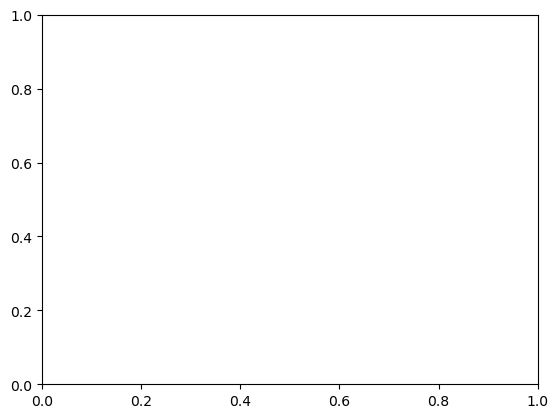

In [42]:
# Create a scatter plot
plt.scatter(x_train,y_train, label='Scatter Plot')

# Add labels and title
plt.xlabel('medv Label')
plt.ylabel('crim Label')
plt.title('Scatter Plot Example')
# Add a legend
plt.legend()

# Show the plot
plt.show()

In [49]:
param_grid = {
    'C': [0.1, 1, 10],        # Regularization parameter
    'penalty': ['l1', 'l2'],  # Regularization type
    'max_iter': [100, 200, 300]  # Maximum number of iterations
}


# Create a GridSearchCV object with cross-validation
grid_search = GridSearchCV(model, param_grid, cv=5)  # 5-fold cross-validation

# Fit the grid search to the training data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_

# Use the best model for predictions
model=LogisticRegression(**best_params)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print the best hyperparameters and evaluation metrics
print(f"Best Hyperparameters: {best_params}")
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")

NameError: name 'X_train' is not defined

In [53]:
SVRModel = SVR(C = 1000 ,epsilon=0.1,kernel = 'linear') # it also can be : linear, poly, rbf, sigmoid, precomputed
SVRModel.fit(x_train, y_train)


SVR(C=1000, kernel='linear')

In [54]:
SVRModel.score(x_train,y_train)

-24.544035102083985

In [56]:
y_pred1=SVRModel.predict(x_test)

In [57]:
#Calculating Mean Absolute Error
MAEValue = mean_absolute_error(y_test, y_pred1, multioutput='uniform_average') # it can be raw_values
print('Mean Absolute Error Value is : ', MAEValue)

#----------------------------------------------------
#Calculating Mean Squared Error
MSEValue = mean_squared_error(y_test, y_pred1, multioutput='uniform_average') # it can be raw_values
print('Mean Squared Error Value is : ', MSEValue)

Mean Absolute Error Value is :  35.49821625573992
Mean Squared Error Value is :  1906.6247774272144


In [43]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Plot ROC Curve
y_prob = best_model.predict_proba(x_test)[:, 1]  # Probability estimates of the positive class
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Plot Confusion Matrix
import seaborn as sns
sns.set()

plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix')
plt.show()


NameError: name 'best_model' is not defined

In [44]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
import matplotlib.pyplot as plt
import numpy as np

# Define the linear regression model with Ridge regularization
ridge_model = Ridge()

# Define hyperparameters to tune
param_grid = {
    'alpha': [0.001, 0.01, 0.1, 1, 10, 100]  # regularization strength
}

# Create a pipeline with feature scaling
pipeline = make_pipeline(StandardScaler(), ridge_model)

# Use GridSearchCV to search for the best hyperparameters
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='r2')
grid_search.fit(x_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Use the best model to make predictions
best_model = grid_search.best_estimator_

# Print R-squared scores
train_score = best_model.score(x_train, y_train)
test_score = best_model.score(x_test, y_test)
print(f"R-squared (Train): {train_score:.4f}")
print(f"R-squared (Test): {test_score:.4f}")

# Plot predicted vs. actual values
y_pred_train = best_model.predict(x_train)
y_pred_test = best_model.predict(x_test)

plt.figure(figsize=(10, 6))

plt.subplot(1, 2, 1)
plt.scatter(y_train, y_pred_train)
plt.title('Train Data: Predicted vs. Actual')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred_test)
plt.title('Test Data: Predicted vs. Actual')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

plt.tight_layout()
plt.show()


ValueError: Invalid parameter 'alpha' for estimator Pipeline(steps=[('standardscaler', StandardScaler()), ('ridge', Ridge())]). Valid parameters are: ['memory', 'steps', 'verbose'].

In [45]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
import matplotlib.pyplot as plt

# Define the linear regression model with Ridge regularization
ridge_model = Ridge()

# Define hyperparameters to tune
param_grid = {
    'ridge__alpha': [0.001, 0.01, 0.1, 1, 10, 100]  # regularization strength
}

# Create a pipeline with feature scaling
pipeline = make_pipeline(StandardScaler(), ('ridge', ridge_model))

# Use GridSearchCV to search for the best hyperparameters
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='r2')
grid_search.fit(x_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Use the best model to make predictions
best_model = grid_search.best_estimator_

# Print R-squared scores
train_score = best_model.score(x_train, y_train)
test_score = best_model.score(x_test, y_test)
print(f"R-squared (Train): {train_score:.4f}")
print(f"R-squared (Test): {test_score:.4f}")

# Plot predicted vs. actual values
y_pred_train = best_model.predict(x_train)
y_pred_test = best_model.predict(x_test)

plt.figure(figsize=(10, 6))

plt.subplot(1, 2, 1)
plt.scatter(y_train, y_pred_train)
plt.title('Train Data: Predicted vs. Actual')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred_test)
plt.title('Test Data: Predicted vs. Actual')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

plt.tight_layout()
plt.show()


ValueError: Invalid parameter 'ridge' for estimator Pipeline(steps=[('standardscaler', StandardScaler()),
                ('tuple', ('ridge', Ridge()))]). Valid parameters are: ['memory', 'steps', 'verbose'].

In [46]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
import matplotlib.pyplot as plt

# Define the linear regression model with Ridge regularization
ridge_model = Ridge()

# Define hyperparameters to tune
param_grid = {
    'ridge__alpha': [0.001, 0.01, 0.1, 1, 10, 100]  # regularization strength
}

# Create a pipeline with feature scaling
pipeline = make_pipeline(StandardScaler(), ('ridge', ridge_model))

# Use GridSearchCV to search for the best hyperparameters
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='r2')
grid_search.fit(x_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Use the best model to make predictions
best_model = grid_search.best_estimator_

# Print R-squared scores
train_score = best_model.score(x_train, y_train)
test_score = best_model.score(x_test, y_test)
print(f"R-squared (Train): {train_score:.4f}")
print(f"R-squared (Test): {test_score:.4f}")

# Plot predicted vs. actual values
y_pred_train = best_model.predict(x_train)
y_pred_test = best_model.predict(x_test)

plt.figure(figsize=(10, 6))

plt.subplot(1, 2, 1)
plt.scatter(y_train, y_pred_train)
plt.title('Train Data: Predicted vs. Actual')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred_test)
plt.title('Test Data: Predicted vs. Actual')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

plt.tight_layout()
plt.show()


ValueError: Invalid parameter 'ridge' for estimator Pipeline(steps=[('standardscaler', StandardScaler()),
                ('tuple', ('ridge', Ridge()))]). Valid parameters are: ['memory', 'steps', 'verbose'].

Best Hyperparameters: {'ridge__alpha': 10}
R-squared (Train): 0.7375
R-squared (Test): 0.7214


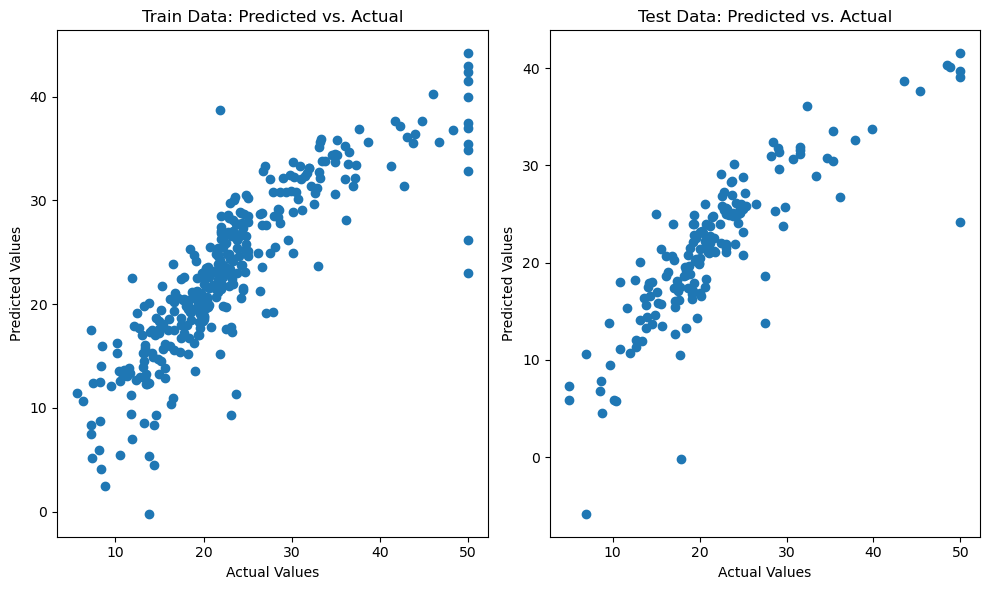

In [54]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt

# Define the linear regression model with Ridge regularization
ridge_model = Ridge()

# Define hyperparameters to tune
param_grid = {
    'ridge__alpha': [0.001, 0.01, 0.1, 1, 10, 100]  # regularization strength
}
steps=[('scaler', StandardScaler()), ('ridge', ridge_model)] 
# Create a pipeline with feature scaling
pipeline = Pipeline(steps)
#[('scaler', StandardScaler()), ('ridge', ridge_model)]
# Use GridSearchCV to search for the best hyperparameters
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='r2')
grid_search.fit(x_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Use the best model to make predictions
best_model = grid_search.best_estimator_

# Print R-squared scores
train_score = best_model.score(x_train, y_train)
test_score = best_model.score(x_test, y_test)
print(f"R-squared (Train): {train_score:.4f}")
print(f"R-squared (Test): {test_score:.4f}")

# Plot predicted vs. actual values
y_pred_train = best_model.predict(x_train)
y_pred_test = best_model.predict(x_test)

plt.figure(figsize=(10, 6))

plt.subplot(1, 2, 1)
plt.scatter(y_train, y_pred_train)
plt.title('Train Data: Predicted vs. Actual')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred_test)
plt.title('Test Data: Predicted vs. Actual')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

plt.tight_layout()
plt.show()
